# __Глава III__
***
### __Задачи__ 
* 4.2
* 5.12 в)
* 5.13

__Задачник:__ Аристова Е.Н, Завьялова Н.А., Лобанов А.И. Практические занятия по вычислительной математике. Часть I. — Москва : Изд-во МФТИ, 2014. — 242 с.

__Задание выполнил:__ Быков Дмитрий, гр. С01-919

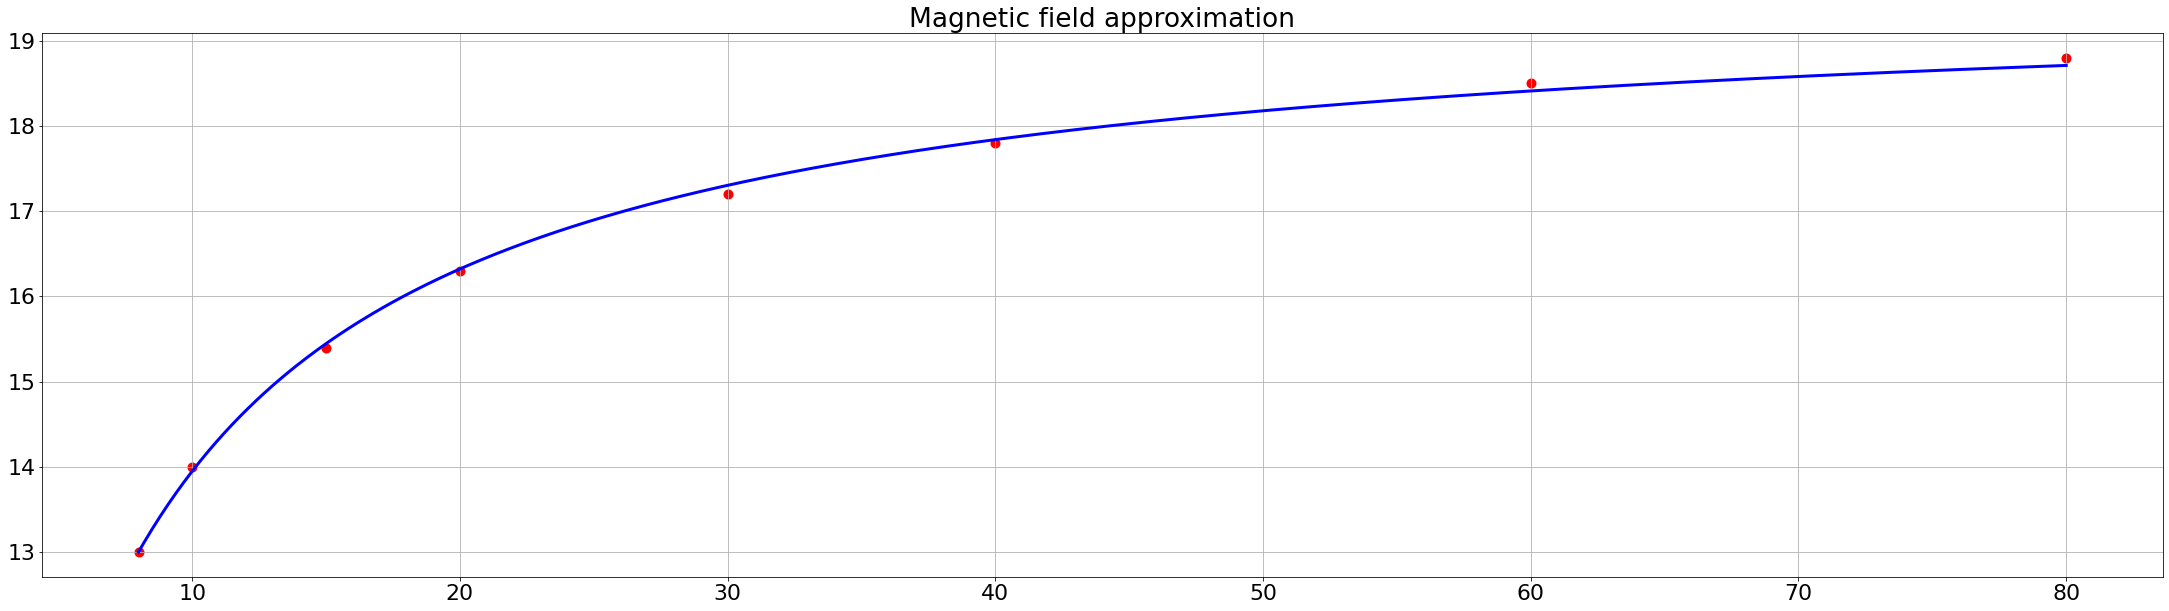

In [28]:
import numpy as np
import matplotlib.pyplot as plot  

__name__ = "MagApprox"

def Function(a, b, x):  return x / (a + b * x) 
def Inverse(data_list): return [1 / value for value in data_list]

def main():
    #Input data
    H = [8, 10, 15, 20, 30, 40, 60, 80]
    B = [13.0, 14.0, 15.4, 16.3, 17.2, 17.8, 18.5, 18.8]

    H_inv = Inverse(H)
    B_inv = Inverse(B)

    n = min(len(H_inv), len(B_inv))

    #Counting sums
    H_inv_sum       = sum(H_inv[i]            for i in range(0, n))
    H_inv_quad_sum  = sum(H_inv[i] ** 2       for i in range(0, n))
    B_inv_sum       = sum(B_inv[i]            for i in range(0, n))
    HB_inv_mult_sum = sum(H_inv[i] * B_inv[i] for i in range(0, n))

    a = (n * HB_inv_mult_sum - H_inv_sum * B_inv_sum) / (n * H_inv_quad_sum - H_inv_sum ** 2)
    b = (B_inv_sum - a * H_inv_sum) / n

    #Graph settings
    interval  = (8, 80)
    step      = 0.1
    x_array   = np.arange(interval[0], interval[1] + step, step)
    appr_func = Function(a, b, x_array)

    #Graph appearance
    plot.figure(figsize = (38, 10))
    plot.title('Magnetic field approximation')
    plot.rc('font', **{'size' : 22})
    plot.grid()

    #Graph data
    for i in range(0, n): plot.scatter(H[i], B[i], color = 'red', marker = 'o', linewidth = 4)
    plot.plot(x_array, appr_func, color = 'blue', linewidth = 3)
    plot.show()


if __name__ == "MagApprox":
    main()

Население США в 2010: 312470336, полином степени 2
Население США в 2010: 309020979, полином степени 3
Население США в 2010: 305706175, полином степени 4
Население США в 2010: 340607731, полином степени 5


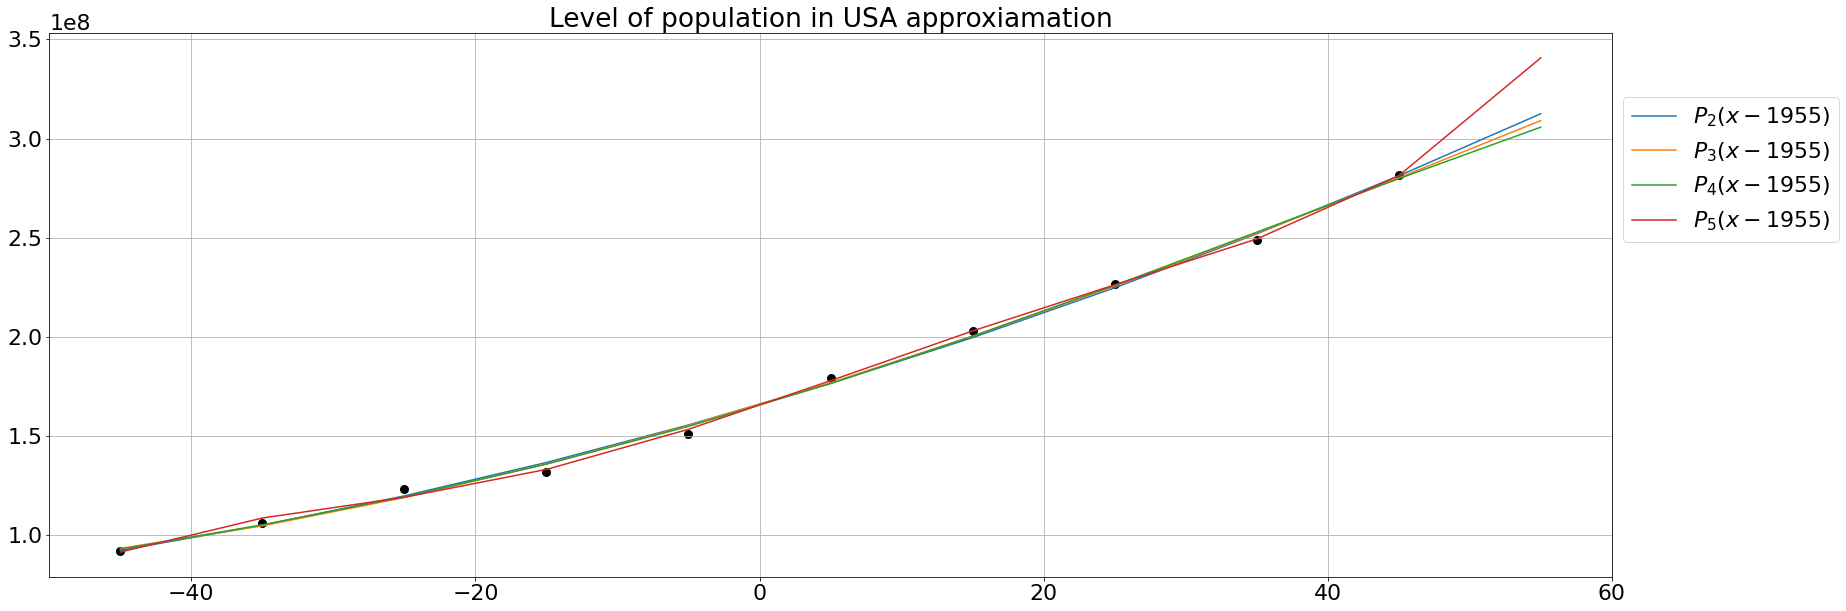

In [109]:
import matplotlib.pyplot as plot  
import numpy as np

__name__ = "PolyApprox"

def Matrix_Minor(matrix, i, j): return [row[:j] + row[j + 1:] for row in (matrix[:i] + matrix[i + 1:])]

def Determinant(matrix):
    if len(matrix) == 2: return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    determinant = 0
    determinant = sum((-1)**col * matrix[0][col] * Determinant(Matrix_Minor(matrix, 0, col)) for col in range(len(matrix)))
    return determinant

def Cramer(matrix, free_vector):
    det_matrix    = Determinant(matrix)
    det_solutions = []

    for i in range(0, len(matrix[0])):
        dup_matrix = [[matrix[i][j] for j in range(0, len(matrix[0]))] for i in range(0, len(matrix[0]))]
        for j in range(0, len(matrix[0])): dup_matrix[j][i] = free_vector[j]
        det_solutions.append(Determinant(dup_matrix))
        
    det_solutions = [value / det_matrix for value in det_solutions]
    return det_solutions

def PolynomCoeff(N, x, y):
    matrix = [[sum(x[i] ** power for i in range(0, len(x))) for power in range(N + eq_power, -1 + eq_power, -1)] for eq_power in range(0, N + 1)]
    vector = [sum(y[i] * x[i] ** power for i in range(0, len(x))) for power in range(0, N + 1)]
    return Cramer(matrix, vector)

def Polynom(coeffs, x, N):
    poly_values = []
    for i in range(0, len(x)): 
        poly_values.append(sum(coeffs[j] * pow(x[i], N - j) for j in range(0, N + 1)))
    
    print('Население США в 2010: ', int(poly_values[-1]), ', полином степени ', N, sep = '')
    return poly_values

def main():
    year_predct = [1910 + 10 * i - 1955 for i in range(0, 11)]
    year_mod    = [1910 + 10 * i - 1955 for i in range(0, 10)]
    population  = [92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 248709873, 281421906]
    
    #Graph1 appearance
    plot.figure(figsize = (28, 10))
    plot.title('Level of population in USA approxiamation')
    plot.rc('font', **{'size' : 22})
    plot.grid()

    #Polynom graphs
    for N in range(2, 6): 
        func = Polynom(PolynomCoeff(N, year_mod, population), year_predct, N)
        plot.plot(year_predct, func, label='$P_{%d}(x - 1955)$' % (N))
    
    #Dots
    for i in range(0, len(year_mod)): plot.scatter(year_mod[i], population[i], color = 'black', linewidths = 3, marker = 'o')    
    
    plot.legend(loc='center left', bbox_to_anchor=(1, 0.75))
    plot.show()

if __name__ == "PolyApprox":
    main()

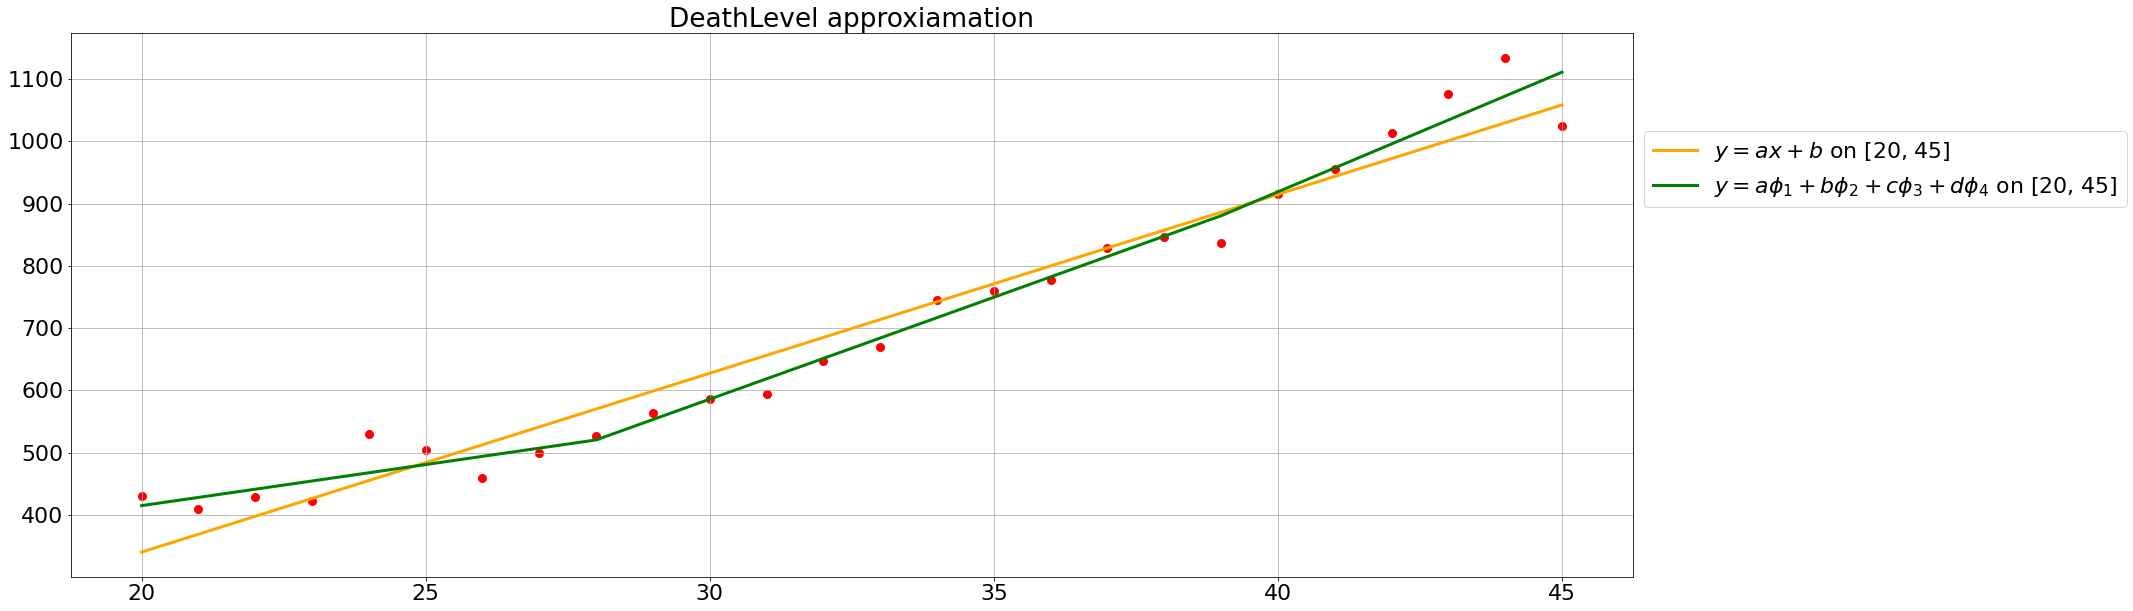

In [29]:
import matplotlib.pyplot as plot  
import numpy as np

__name__ = "DeathLevelApprox"

def Matrix_Minor(matrix, i, j): return [row[:j] + row[j + 1:] for row in (matrix[:i] + matrix[i + 1:])]

def Determinant(matrix):
    if len(matrix) == 2: return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    determinant = 0
    determinant = sum((-1)**col * matrix[0][col] * Determinant(Matrix_Minor(matrix, 0, col)) for col in range(len(matrix)))
    return determinant

def Cramer(matrix, free_vector):
    det_matrix    = Determinant(matrix)
    det_solutions = []

    for i in range(0, len(matrix[0])):
        dup_matrix = [[matrix[i][j] for j in range(0, len(matrix[0]))] for i in range(0, len(matrix[0]))]
        for j in range(0, len(matrix[0])): dup_matrix[j][i] = free_vector[j]
        det_solutions.append(Determinant(dup_matrix))
        
    det_solutions = [value / det_matrix for value in det_solutions]
    return det_solutions

def Basis_Function_1(x):
    if (x >= 20 and x <= 28): return -x / 28 + 1
    else:                    return 0

def Basis_Function_2(x):
    if   (x >= 28 and x <= 39): return x / 11 - 28 / 11
    elif (x >= 39 and x <= 45): return -x / 6 + 7.5
    else:                       return 0

def Basis_Function_3(x):
    if   (x >= 20 and x <= 28): return 0.125 * x - 2.5
    elif (x >= 28 and x <= 39): return -x / 11 + 39 / 11
    else:                      return 0

def Basis_Function_4(x):
    if (x >= 39 and x <= 45): return x / 6 - 6.5
    else:                     return 0 

def Lin_Approx(coeff, x): 
    result = []
    for i in range(0, len(x)): result.append(coeff[0] * x[i] + coeff[1])
    return result 

def Basis_Approx(coeff, x):
    result = []
    for i in range(0, len(x)): 
        result.append(coeff[0] * Basis_Function_1(x[i]) + coeff[1] * Basis_Function_2(x[i]) + coeff[2] * Basis_Function_3(x[i]) + coeff[3] * Basis_Function_4(x[i]))
    return result

def Lin_Coeff(x, y):
    n = min(len(x), len(y))
    x_sum       = sum(x[i]        for i in range(0, n))
    x_quad_sum  = sum(x[i] * x[i] for i in range(0, n))
    y_sum       = sum(y[i]        for i in range(0, n))   
    xy_mult_sum = sum(x[i] * y[i] for i in range(0, n))

    a = (n * xy_mult_sum - x_sum * y_sum) / (n * x_quad_sum - x_sum * x_sum)
    b = (y_sum - a * x_sum) / n
    return (a, b)

def Basis_Coeff(x, y):
    n = min(len(x), len(y))
    matrix = [[sum(Basis_Function_1(x[i]) * Basis_Function_1(x[i]) for i in range(0, n)), sum(Basis_Function_1(x[i]) * Basis_Function_2(x[i]) for i in range(0, n)), 
               sum(Basis_Function_1(x[i]) * Basis_Function_3(x[i]) for i in range(0, n)), sum(Basis_Function_1(x[i]) * Basis_Function_4(x[i]) for i in range(0, n))], 
              [sum(Basis_Function_2(x[i]) * Basis_Function_1(x[i]) for i in range(0, n)), sum(Basis_Function_2(x[i]) * Basis_Function_2(x[i]) for i in range(0, n)), 
               sum(Basis_Function_2(x[i]) * Basis_Function_3(x[i]) for i in range(0, n)), sum(Basis_Function_2(x[i]) * Basis_Function_4(x[i]) for i in range(0, n))],
              [sum(Basis_Function_3(x[i]) * Basis_Function_1(x[i]) for i in range(0, n)), sum(Basis_Function_3(x[i]) * Basis_Function_2(x[i]) for i in range(0, n)), 
               sum(Basis_Function_3(x[i]) * Basis_Function_3(x[i]) for i in range(0, n)), sum(Basis_Function_3(x[i]) * Basis_Function_4(x[i]) for i in range(0, n))],
              [sum(Basis_Function_4(x[i]) * Basis_Function_1(x[i]) for i in range(0, n)), sum(Basis_Function_4(x[i]) * Basis_Function_2(x[i]) for i in range(0, n)), 
               sum(Basis_Function_4(x[i]) * Basis_Function_3(x[i]) for i in range(0, n)), sum(Basis_Function_4(x[i]) * Basis_Function_4(x[i]) for i in range(0, n))]]

    vector = [sum(Basis_Function_1(x[i]) * y[i] for i in range(0, n)), sum(Basis_Function_2(x[i]) * y[i] for i in range(0, n)),
              sum(Basis_Function_3(x[i]) * y[i] for i in range(0, n)), sum(Basis_Function_4(x[i]) * y[i] for i in range(0, n))]

    return Cramer(matrix, vector)
    

def main():
    x = [20 + i for i in range(0, 26)]
    y = [431, 409, 429, 422, 530, 505, 459, 499, 526, 563, 587, 595, 647, 669, 746, 760, 778, 828, 846, 836, 916, 956, 1014, 1076, 1134, 1024]

    #Lines at the junction
    x_interval_1 = [20, 21, 22, 23, 24, 25, 26, 27, 28]
    y_interval_1 = [431, 409, 429, 422, 530, 505, 459, 499, 526]

    x_interval_2 = [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
    y_interval_2 = [526, 563, 587, 595, 647, 669, 746, 760, 778, 828, 846, 836]

    x_interval_3 = [39, 40, 41, 42, 43, 44, 45]
    y_interval_3 = [836, 916, 956, 1014, 1076, 1134, 1024]

    #Interval
    step = 1
    x_array = np.arange(x[0], x[-1] + step, step)

    #Graph appearance
    plot.figure(figsize = (28, 10))
    plot.title('DeathLevel approxiamation')
    plot.rc('font', **{'size' : 22})
    plot.grid()

    #Lin approximation function
    plot.plot(x_array, Lin_Approx(Lin_Coeff(x, y), x_array), color = 'orange', label='$y = ax + b$ on [20, 45]', linewidth = 3)
        
    #Basis approximation function
    plot.plot(x_array, Basis_Approx(Basis_Coeff(x, y), x_array), color = 'green',  label='$y = a\phi_{1} + b\phi_{2} + c\phi_{3} + d\phi_{4}$ on [20, 45]', linewidth = 3)

    # #Sections
    # plot.plot(x_interval_1, Lin_Approx(Lin_Coeff(x_interval_1, y_interval_1), x_interval_1), color = 'black',  label='$y = ax + b$ on [20, 28]', linewidth = 4)
    # plot.plot(x_interval_2, Lin_Approx(Lin_Coeff(x_interval_2, y_interval_2), x_interval_2), color = 'purple', label='$y = ax + b$ on [28, 39]', linewidth = 3)
    # plot.plot(x_interval_3, Lin_Approx(Lin_Coeff(x_interval_3, y_interval_3), x_interval_3), color = 'blue',   label='$y = ax + b$ on [39, 45]', linewidth = 3)

    #Dots
    for i in range(0, len(x)): plot.scatter(x[i], y[i], color = 'red', linewidth = 3, marker = 'o')    
    
    plot.legend(loc='center left', bbox_to_anchor=(1, 0.75))
    plot.show()

if __name__ == "DeathLevelApprox":
    main()